In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
# Varify GPU method 1
print(tf.config.experimental.list_physical_devices())

# Varify GPU method 2
print(tf.test.is_built_with_cuda())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


### Use ANN to classify this [image dataset](https://www.cs.toronto.edu/~kriz/cifar.html)


<img src="https://i.imgur.com/1GL6JG7.png" alt="img" width="700"/>

In [15]:
# Download and load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(X_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


deer


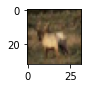

In [29]:
# show image
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def plot_sample(index):
    plt.figure(figsize=(10, 1))
    plt.imshow(X_train[index])

idx = 3
print(classes[y_train[idx][0]])
plot_sample(idx)

# normalize image
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
# Apply One Hot Encoding to y_train, if using sparse_categorical_crossentropy we don't need to apply this
# 1 --> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")

X_test_scaled.shape

(10000, 32, 32, 3)

In [33]:
# define, compile and train model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), # use test set shape
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 3s 1ms/step - loss: 1.8089 - accuracy: 0.3563
Epoch 2/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6234 - accuracy: 0.4275
Epoch 3/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5421 - accuracy: 0.4571
Epoch 4/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4829 - accuracy: 0.4781
Epoch 5/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4316 - accuracy: 0.4931
Epoch 6/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3909 - accuracy: 0.5119
Epoch 7/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3554 - accuracy: 0.5241
Epoch 8/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3179 - accuracy: 0.5388
Epoch 9/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2855 - accuracy: 0.5468
Epoch 10/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.255

In [40]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

'ship'

In [41]:
classes[y_test[1][0]]

'ship'

In [47]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32, 32, 3)), # use test set shape
            keras.layers.Dense(3000, activation="relu"),
            keras.layers.Dense(1000, activation="relu"),
            keras.layers.Dense(10, activation="sigmoid")
    ])
    model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

    return model



In [52]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.8084 - accuracy: 0.3550
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6240 - accuracy: 0.4274
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5441 - accuracy: 0.4542
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4821 - accuracy: 0.4783
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4319 - accuracy: 0.4953
Epoch 6/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.3888 - accuracy: 0.5130
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3507 - accuracy: 0.5245
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3164 - accuracy: 0.5378
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2863 - accuracy: 0.5486
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [53]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8106 - accuracy: 0.3549
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6229 - accuracy: 0.4274
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5411 - accuracy: 0.4572
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4828 - accuracy: 0.4754
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4326 - accuracy: 0.4960
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3871 - accuracy: 0.5115
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3513 - accuracy: 0.5256
Epoch 8/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.3162 - accuracy: 0.5369
Epoch 9/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.2838 - accuracy: 0.5511
Epoch 10/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.252

### 270s CPU vs. 22s GPU